In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Position_Salaries.csv")

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.shape

(10, 3)

In [5]:
#This is a small dataset with only 10 tuples

In [6]:
#Let's do the EDA of this dataset 

In [7]:
df["Position"].unique()

array(['Business Analyst', 'Junior Consultant', 'Senior Consultant',
       'Manager', 'Country Manager', 'Region Manager', 'Partner',
       'Senior Partner', 'C-level', 'CEO'], dtype=object)

In [8]:
len(df["Position"].unique())

10

In [9]:
#each tuple is having a uique position

In [10]:
df["Level"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [11]:
df["Salary"].unique()

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [12]:
len(df["Salary"].unique())

10

In [13]:
#each person/tuple has different salary

<AxesSubplot:xlabel='Position', ylabel='Salary'>

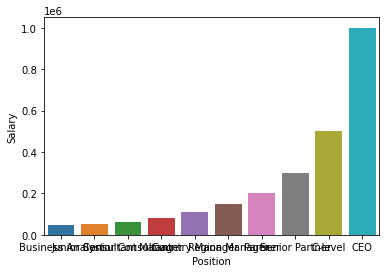

In [14]:
sns.barplot(x="Position", y="Salary", data=df)

<AxesSubplot:xlabel='Level', ylabel='Salary'>

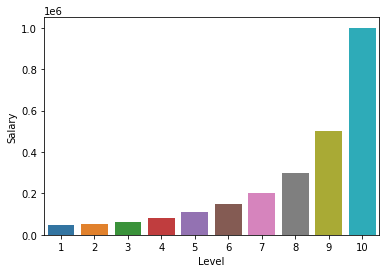

In [15]:
#here we see that from position: Business Analyst to CEO the Salary increases
sns.barplot(x="Level", y="Salary", data=df)
#and so the level also increases, hence we can say that the as the level increases the salary of the employees also increases

<AxesSubplot:xlabel='Salary', ylabel='Level'>

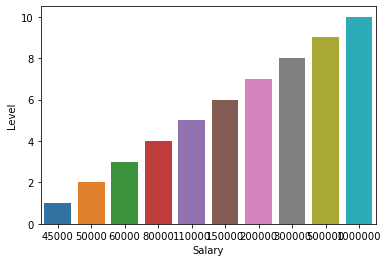

In [16]:
sns.barplot(x="Salary", y="Level", data=df)

In [17]:
#lets see the plot between level and salary

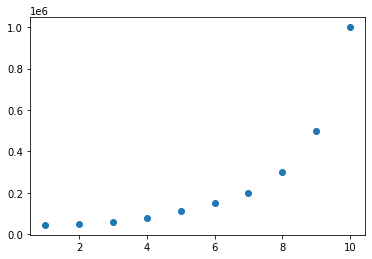

In [18]:
plt.scatter(df["Level"], df["Salary"])

In [19]:
#Let's do first the data preprocessing 

In [20]:
#missing values check
df.isnull().sum()
#no missing values

Position    0
Level       0
Salary      0
dtype: int64

In [21]:
#character data removed
#level only should work we don't need the position column since all the values for all the tuples differ

In [22]:
#so next

In [23]:
#Lets try first the KNN technique
import sklearn 
from sklearn.model_selection import train_test_split

In [24]:
x=df[["Level"]]

In [25]:
y=df[["Salary"]]

In [26]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [27]:
x_train.head()

,Level
5,6
0,1
7,8
2,3
9,10


In [28]:
x_test.head()

,Level
8,9
1,2


In [29]:
y_train

,Salary
5,150000
0,45000
7,300000
2,60000
9,1000000
4,110000
3,80000
6,200000


In [30]:
y_test

,Salary
8,500000
1,50000


In [31]:
#let's first scale the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [32]:
mnmx=MinMaxScaler()

In [33]:
x_train_s=mnmx.fit_transform(x_train)

In [34]:
x_test_s=mnmx.transform(x_test)

In [35]:
x_train_s

array([[0.55555556],
       [0.        ],
       [0.77777778],
       [0.22222222],
       [1.        ],
       [0.44444444],
       [0.33333333],
       [0.66666667]])

In [36]:
x_test_s

array([[0.88888889],
       [0.11111111]])

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
krange=range(1, 8, 1)
mses=[]
for k in krange:
    m=KNeighborsRegressor(n_neighbors=k)
    m.fit(x_train_s, y_train)
    y_pd=m.predict(x_test_s)
    mse=mean_squared_error(y_test, y_pd)
    mses.append(mse)
mses

[20012500000.0,
 11253125000.0,
 68055555.55555552,
 4110156250.0,
 11712500000.0,
 20342013888.888885,
 29734948979.59184]

Text(0.5, 1.0, 'Elbow Curve for getting optimised K value')

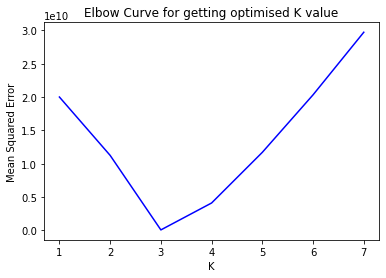

In [39]:
plt.plot(krange, mses, color="blue")
plt.xlabel("K")
plt.ylabel("Mean Squared Error")
plt.title("Elbow Curve for getting optimised K value")

In [40]:
#lets choose k value to be 3

In [41]:
model_KNN=KNeighborsRegressor(n_neighbors=3)
model_KNN.fit(x_train_s, y_train)

KNeighborsRegressor(n_neighbors=3)

In [42]:
y_pred=model_KNN.predict(x_test_s)

In [43]:
y_test

,Salary
8,500000
1,50000


In [44]:
y_pred

array([[500000.        ],
       [ 61666.66666667]])

In [45]:
mean_squared_error(y_test, y_pred)

68055555.55555552

In [46]:
mean_absolute_error(y_test, y_pred)

5833.333333333332

In [47]:
r2_score(y_test, y_pred)

0.9986556927297668

In [48]:
#accuracy got is 99.86556927297668%

In [49]:
#lets try with Linear Regression Model
import sklearn 
from sklearn.linear_model import LinearRegression

In [50]:
model_LR=LinearRegression()
model_LR.fit(x, y)

LinearRegression()

In [51]:
y_pred=model_LR.predict(x)

In [52]:
y_pred

array([[-114454.54545455],
       [ -33575.75757576],
       [  47303.03030303],
       [ 128181.81818182],
       [ 209060.60606061],
       [ 289939.39393939],
       [ 370818.18181818],
       [ 451696.96969697],
       [ 532575.75757576],
       [ 613454.54545455]])

In [53]:
r2_score(y, y_pred)

0.6690412331929895

In [54]:
#poor accuracy

In [55]:
#Let's try Polynomial Features

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
x

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [58]:
y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


In [62]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x)
model_poly=LinearRegression()
model_poly.fit(x_poly, y)
y_pred=model_poly.predict(x_poly)

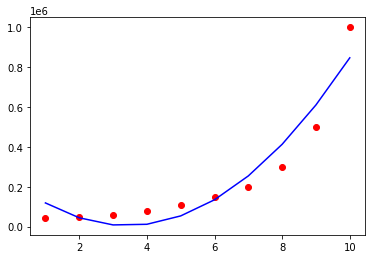

In [63]:
plt.scatter(x, y, color="red")
plt.plot(x["Level"], model_poly.predict(x_poly), color="blue")

In [64]:
r2_score(y, y_pred)

0.9162082221443942

In [66]:
#accuracy increased 
#let's try with degree=3
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
model_poly=LinearRegression()
model_poly.fit(x_poly, y)
y_pred=model_poly.predict(x_poly)

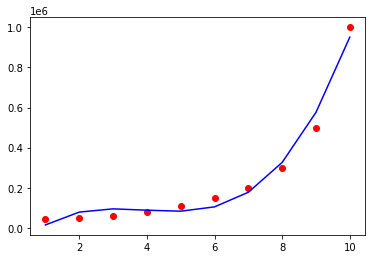

In [67]:
plt.scatter(x, y, color="red")
plt.plot(x["Level"], model_poly.predict(x_poly), color="blue")

In [68]:
r2_score(y, y_pred)

0.9812097727913367

In [69]:
#accuracy further increased
#make degree=4
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x)
model_poly=LinearRegression()
model_poly.fit(x_poly, y)
y_pred=model_poly.predict(x_poly)

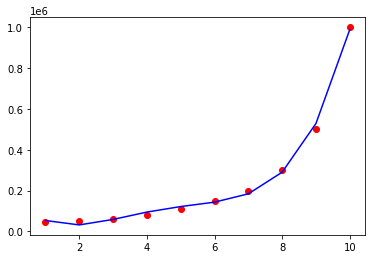

In [70]:
plt.scatter(x, y, color="red")
plt.plot(x["Level"], model_poly.predict(x_poly), color="blue")

In [71]:
r2_score(y, y_pred)

0.9973922891706614

In [74]:
#again increase in accuracy
#let's try for degree=5
poly=PolynomialFeatures(degree=5)
x_poly=poly.fit_transform(x)
model_poly=LinearRegression()
model_poly.fit(x_poly, y)
y_pred=model_poly.predict(x_poly)

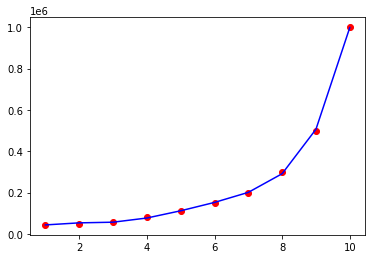

In [75]:
plt.scatter(x, y, color="red")
plt.plot(x["Level"], model_poly.predict(x_poly), color="blue")

In [76]:
r2_score(y, y_pred)

0.9997969027099755

In [77]:
#now the accuracy is 99.979% approx
#lets further increase the degree say degree=6
poly=PolynomialFeatures(degree=6)
x_poly=poly.fit_transform(x)
model_poly=LinearRegression()
model_poly.fit(x_poly, y)
y_pred=model_poly.predict(x_poly)

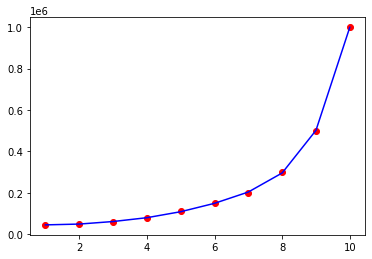

In [78]:
plt.scatter(x, y, color="red")
plt.plot(x["Level"], model_poly.predict(x_poly), color="blue")

In [79]:
r2_score(y, y_pred)

0.9999494749253776

In [81]:
poly=PolynomialFeatures(degree=7)
x_poly=poly.fit_transform(x)
model_poly=LinearRegression()
model_poly.fit(x_poly, y)
y_pred=model_poly.predict(x_poly)

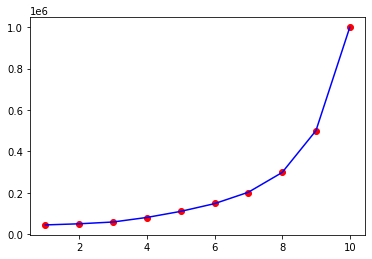

In [82]:
plt.scatter(x, y, color="red")
plt.plot(x["Level"], model_poly.predict(x_poly), color="blue")

In [83]:
r2_score(y, y_pred)

0.9999770143729169

In [84]:
poly=PolynomialFeatures(degree=8)
x_poly=poly.fit_transform(x)
model_poly=LinearRegression()
model_poly.fit(x_poly, y)
y_pred=model_poly.predict(x_poly)

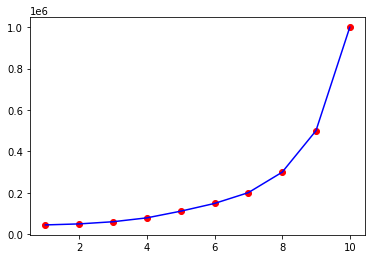

In [85]:
plt.scatter(x, y, color="red")
plt.plot(x["Level"], model_poly.predict(x_poly), color="blue")

In [86]:
r2_score(y, y_pred)

0.9999934972438328

In [87]:
poly=PolynomialFeatures(degree=9)
x_poly=poly.fit_transform(x)
model_poly=LinearRegression()
model_poly.fit(x_poly, y)
y_pred=model_poly.predict(x_poly)

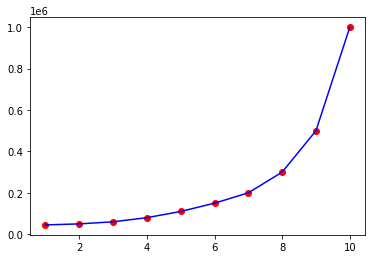

In [88]:
plt.scatter(x, y, color="red")
plt.plot(x["Level"], model_poly.predict(x_poly), color="blue")

In [89]:
r2_score(y, y_pred)

0.9999999999999797

In [100]:
poly=PolynomialFeatures(degree=10)
model_poly=LinearRegression()
model_poly.fit(x_poly, y)
y_pred=model_poly.predict(x_poly)

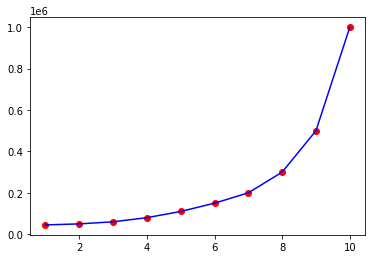

In [101]:
plt.scatter(x, y, color="red")
plt.plot(x["Level"], model_poly.predict(x_poly), color="blue")

In [102]:
r2_score(y, y_pred)

0.9999999999999797

In [103]:
#we see that now the accuracy isn't changing thus we can conclude here that
#degree of the polynomial is thus 9.